In [1]:
import pandas as pd

df_all = pd.read_csv("../data/BuildingDataset/all.csv")

In [4]:
df_all = df_all.dropna()
df_all.head()

,f1,f2,vol.build,vol.min,vol.max,vol.mean,vol.med,vol.range,vol.std,vol.gini,...,long_short.min,long_short.max,long_short.mean,long_short.med,long_short.range,long_short.std,long_short.gini,meanheight.build,meanheight_height.build,height_soil.build
1,389664.0,681.010,299.898,9.49611,264.209,99.9660,26.1931,254.7130,116.3370,0.566221,...,0.576531,0.916360,0.803084,0.916360,0.339829,0.160197,0.094035,6.47268,0.676846,0.206398
2,1732610.0,849.511,299.779,61.64700,173.546,99.9262,64.5855,111.8990,52.0710,0.248848,...,0.880911,0.920836,0.906950,0.919103,0.039925,0.018426,0.009783,9.29326,0.524066,0.549730
3,729853.0,652.527,299.944,38.34540,204.048,99.9812,57.5505,165.7020,74.0026,0.368296,...,0.504456,0.689910,0.617374,0.657757,0.185454,0.080917,0.066754,3.90003,0.602600,0.084152
4,2629310.0,786.246,299.862,22.43900,246.035,99.9541,31.3882,223.5960,103.3590,0.497108,...,0.618281,0.738355,0.658306,0.618281,0.120073,0.056603,0.040533,23.62600,1.000000,1.861480
5,160481.0,724.934,299.872,61.40950,138.446,99.9572,100.0160,77.0365,31.4500,0.171265,...,0.516423,0.764904,0.601795,0.524058,0.248481,0.115378,0.091756,6.74065,0.613009,0.247173


## Non-dominated sorting

In [6]:
from desdeo_tools.utilities import non_dominated

non_dom_inds = non_dominated(df_all[["f1", "f2"]].values)

In [12]:
df_nondom = df_all[non_dom_inds]
df_nondom.head()

,f1,f2,vol.build,vol.min,vol.max,vol.mean,vol.med,vol.range,vol.std,vol.gini,...,long_short.min,long_short.max,long_short.mean,long_short.med,long_short.range,long_short.std,long_short.gini,meanheight.build,meanheight_height.build,height_soil.build
40956,38918.9,611.243,299.835,93.7898,109.958,99.9450,96.0875,16.1678,7.14185,0.035948,...,0.756792,0.784859,0.774131,0.780744,0.028067,0.012375,0.008057,5.101,1.0,0.086782
42047,38918.9,611.243,299.835,93.7898,109.958,99.9450,96.0875,16.1678,7.14185,0.035948,...,0.756792,0.784859,0.774131,0.780744,0.028067,0.012375,0.008057,5.101,1.0,0.086782
42540,38189.1,611.491,299.822,93.7849,109.949,99.9406,96.0880,16.1639,7.13910,0.035941,...,0.766168,0.793444,0.783017,0.789439,0.027276,0.012026,0.007741,5.049,1.0,0.085025
42575,34635.4,614.331,299.859,95.0271,109.622,99.9531,95.2102,14.5949,6.83739,0.032448,...,0.805630,0.827032,0.819806,0.826757,0.021402,0.010025,0.005801,4.607,1.0,0.070781
42901,35338.7,613.638,299.872,94.1559,108.421,99.9574,97.2959,14.2647,6.12008,0.031713,...,0.799751,0.821392,0.812557,0.816529,0.021641,0.009270,0.005918,4.647,1.0,0.072013


## Plotting the front

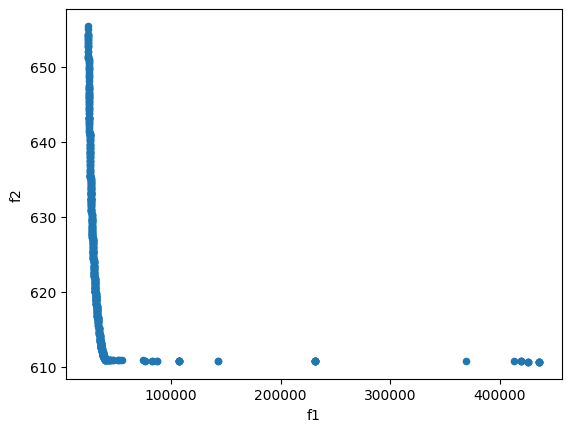

In [16]:
import matplotlib.pyplot as plt

df_nondom.plot(kind="scatter", x="f1", y="f2")
plt.show()

## Objective value distribution

fs shape = (665, 2)
xs shape = (665, 99)
Ideal: [24468.5     610.657]
Nadir: [435965.       655.447]


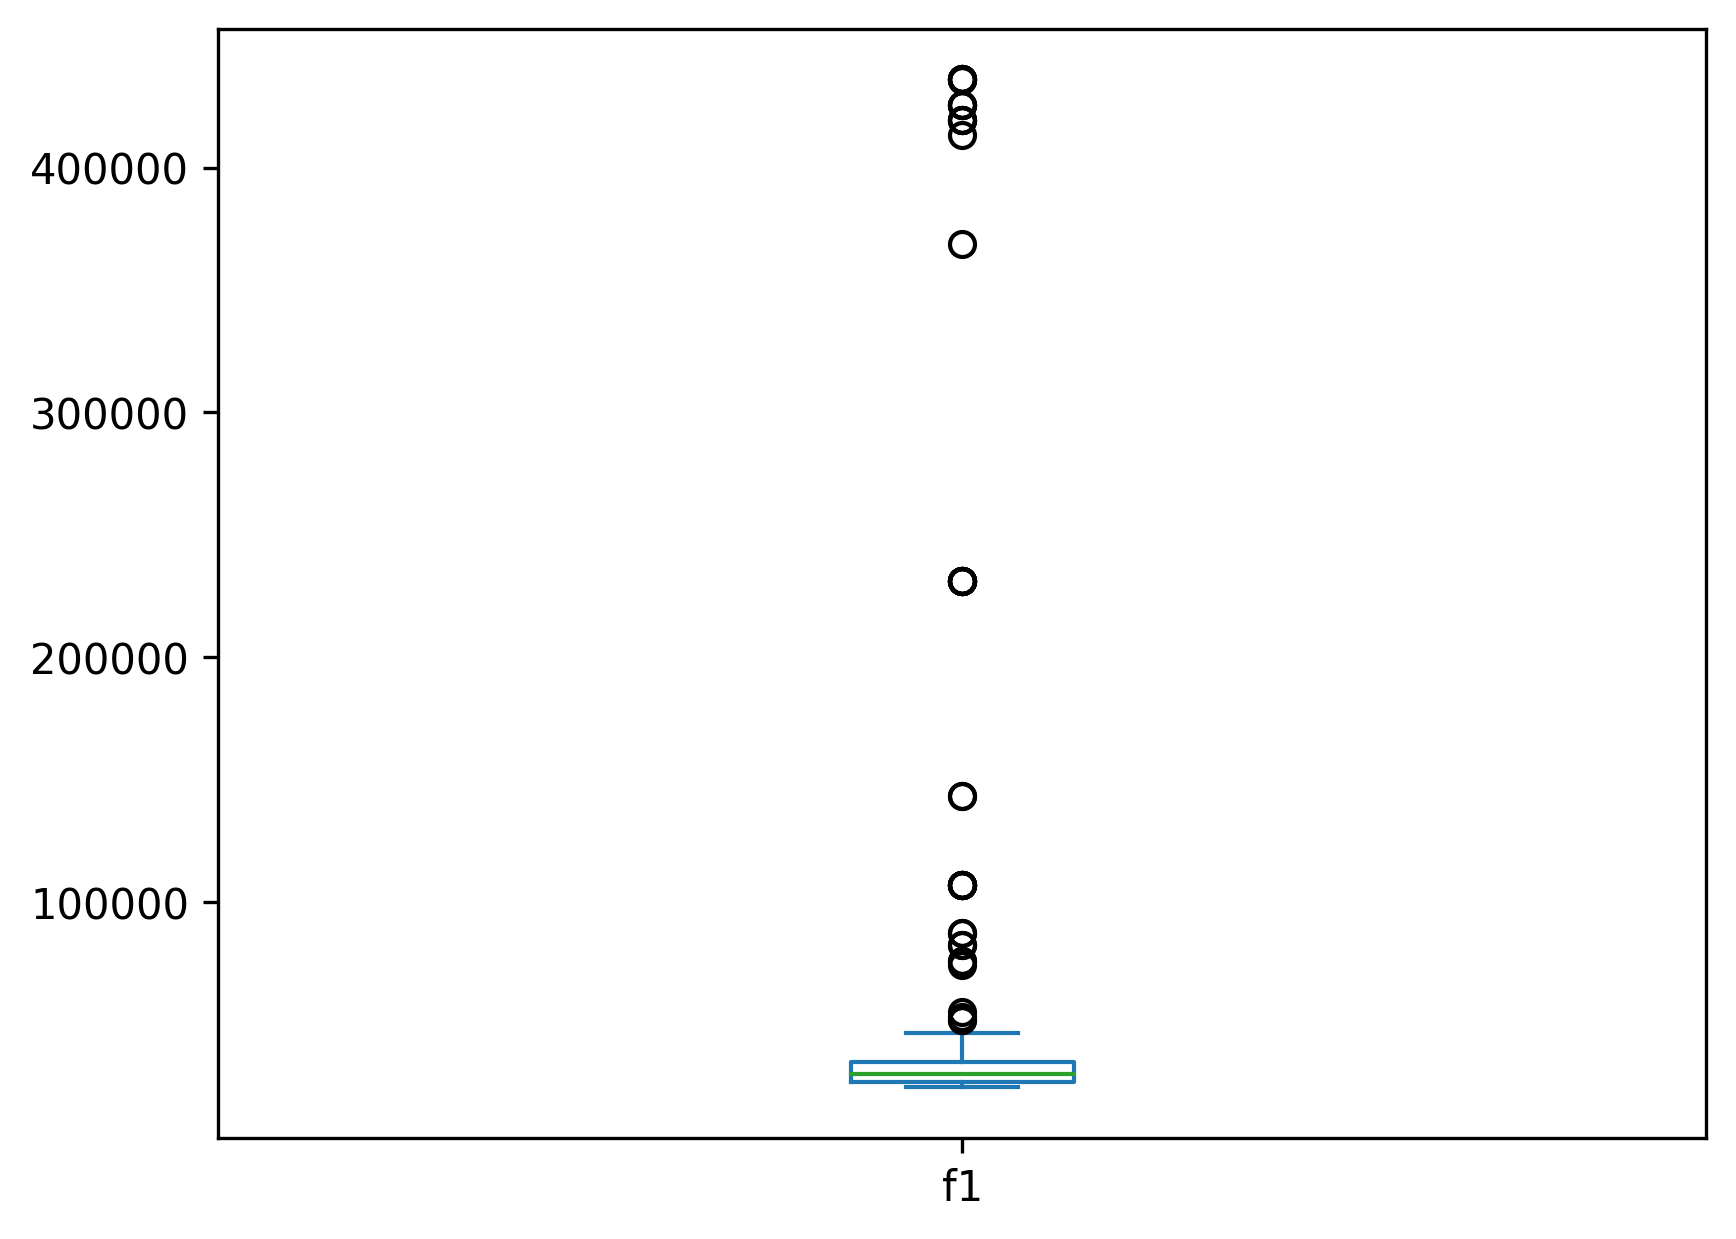

In [102]:
fs = df_nondom[["f1", "f2"]]
xs = df_nondom.drop(["f1", "f2"], axis=1)

print(f"fs shape = {fs.shape}")
print(f"xs shape = {xs.shape}")

ideal = np.min(fs, axis=0)
nadir = np.max(fs, axis=0)

print(f"Ideal: {ideal.values}")
print(f"Nadir: {nadir.values}")

fs["f1"].plot(kind="box")
plt.show()

# Case 1

Suppose a decision maker is interested in the decision variables for solutions with objective values in a certain range of interest. We can use an explainable machine learning model to build an understanding of the features of the
decision variables that belong to solutions with objective values in the desired range.

Let us next define such a range:

In [119]:
import numpy as np

range_min = np.array([30_000, 610])
range_max = np.array([120_000, 635])

Next, we can label the data as follows:

1: the solution is in the desired objective value range.

0: the solution is not in the desired objective value range.

In [120]:
labels = np.array(np.all(fs > range_min, axis=1) & np.all(fs < range_max, axis=1), dtype=int)
print(f"Positive example: {labels.sum()}; negative examples: {fs.shape[0] - labels.sum()}")

Positive example: 291; negative examples: 374


## Rulefit classifier

In [121]:
from imodels import RuleFitClassifier as Classifier

classifier = Classifier()

classifier.fit(X=xs, y=labels)
classifier

RuleFitClassifier()

In [122]:
rules = classifier._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    # 'rule' is how the feature is constructed
    # 'coef' is its weight in the final linear model
    # 'support' is the fraction of points it applies to
display(rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis'))

,rule,coef,support
0,vol.build,-0.000470,1.000000
3,vol.mean,-0.001310,1.000000
100,in_out.min <= 0.39632 and long_short.max > 0.86652,-0.157783,0.572932
105,short.med <= 3.3205 and long_short.max > 0.86657,-0.008174,0.568421
103,long_short.max > 0.8664 and long_short.med > 0.70704,-0.961141,0.566917
104,out.std > 20.32545 and long_short.max > 0.8663,-0.100889,0.562406
101,out_vol.med > 0.79646 and long_short.max > 0.8663,-1.617472,0.559398
99,vert.max > 117.043 and long_short.max > 0.86657,-1.021194,0.557895
102,vert.max > 117.728 and long_short.max > 0.86652,-0.211666,0.547368
110,short.gini <= 0.3107 and long_short.med <= 0.86613,0.487873,0.440602
